<a href="https://colab.research.google.com/github/LilianeEff/Data201/blob/main/Project3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Project 3**
Liliane Effoudou

Data 201

Prepare and wrangle your data with Pandas and Numpy
3. Use EDA principles and the Matplotlib / Seaborn packages to visualize the data.
4. Use scikit-learn KMeans to train the data. Use appropriate metric.
5. Plot the Elbow Method to choose optimal number of clusters
6. Check if the clusters differ with respect to certain interesting features
7. Interpret the result of the algorithm
8. Submit a link to the GitHub URL and Present in the class
A
Meets
Expectation
Criteria 8 is not fulfilled B
Sufficient 8, 5, and 4 are not fulfilled C
Insufficient Most of the criteria are not fulfilled F


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score

**Prepare and wrangle your data**

In [4]:
#Prepare and wrangle your data
df=pd.read_csv('https://raw.githubusercontent.com/LilianeEff/Data110/refs/heads/main/Dataset/fatal-police-shootings-data.csv')
df.head()

,id,date,threat_type,flee_status,armed_with,city,county,state,latitude,longitude,location_precision,name,age,gender,race,race_source,was_mental_illness_related,body_camera,agency_ids
0,3,2015-01-02,point,not,gun,Shelton,Mason,WA,47.246826,-123.121592,not_available,Tim Elliot,53.0,male,A,not_available,True,False,73
1,4,2015-01-02,point,not,gun,Aloha,Washington,OR,45.487421,-122.891696,not_available,Lewis Lee Lembke,47.0,male,W,not_available,False,False,70
2,5,2015-01-03,move,not,unarmed,Wichita,Sedgwick,KS,37.694766,-97.280554,not_available,John Paul Quintero,23.0,male,H,not_available,False,False,238
3,8,2015-01-04,point,not,replica,San Francisco,San Francisco,CA,37.762910,-122.422001,not_available,Matthew Hoffman,32.0,male,W,not_available,True,False,196
4,9,2015-01-04,point,not,other,Evans,Weld,CO,40.383937,-104.692261,not_available,Michael Rodriguez,39.0,male,H,not_available,False,False,473


In [ ]:
#clean my data of unnecessary columns
columns_to_drop = ['location_precision', 'race_source', 'id']
df = df.drop(columns=columns_to_drop, errors='ignore')
df.head()

,date,threat_type,flee_status,armed_with,city,county,state,latitude,longitude,name,age,gender,race,was_mental_illness_related,body_camera,agency_ids
0,2015-01-02,point,not,gun,Shelton,Mason,WA,47.246826,-123.121592,Tim Elliot,53.0,male,A,True,False,73
1,2015-01-02,point,not,gun,Aloha,Washington,OR,45.487421,-122.891696,Lewis Lee Lembke,47.0,male,W,False,False,70
2,2015-01-03,move,not,unarmed,Wichita,Sedgwick,KS,37.694766,-97.280554,John Paul Quintero,23.0,male,H,False,False,238
3,2015-01-04,point,not,replica,San Francisco,San Francisco,CA,37.762910,-122.422001,Matthew Hoffman,32.0,male,W,True,False,196
4,2015-01-04,point,not,other,Evans,Weld,CO,40.383937,-104.692261,Michael Rodriguez,39.0,male,H,False,False,473


**Use EDA principles and the Matplotlib / Seaborn packages to visualize the data.**

In [5]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9497 entries, 0 to 9496
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          9497 non-null   int64  
 1   date                        9497 non-null   object 
 2   threat_type                 9430 non-null   object 
 3   flee_status                 8199 non-null   object 
 4   armed_with                  9285 non-null   object 
 5   city                        9427 non-null   object 
 6   county                      4775 non-null   object 
 7   state                       9497 non-null   object 
 8   latitude                    8446 non-null   float64
 9   longitude                   8446 non-null   float64
 10  location_precision          8446 non-null   object 
 11  name                        9152 non-null   object 
 12  age                         9110 non-null   float64
 13  gender                      9470 

,id,latitude,longitude,age
count,9497.000000,8446.000000,8.446000e+03,9110.00000
mean,5219.041066,36.641434,-1.066443e+12,37.42371
std,2954.630853,5.338954,9.800835e+13,12.93761
min,3.000000,19.497503,-9.007175e+15,2.00000
25%,2657.000000,33.462314,-1.119961e+02,28.00000
50%,5249.000000,36.077343,-9.434420e+01,35.00000
75%,7787.000000,40.033470,-8.318070e+01,45.00000
max,10284.000000,71.301255,-6.786717e+01,92.00000


-What age range sees the most amounts of deaths?

The dataset and the graph show ages 30-33 are the ones most affected.

age
33.0    318
34.0    316
31.0    313
32.0    306
30.0    303
       ... 
8.0       1
92.0      1
2.0       1
85.0      1
4.0       1
Name: count, Length: 83, dtype: int64


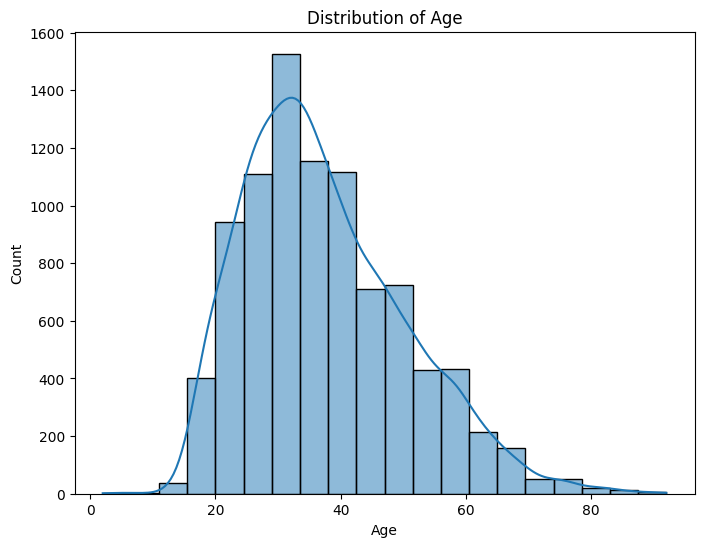

In [8]:
print(df['age'].value_counts())
plt.figure(figsize=(8, 6))
sns.histplot(df['age'], bins=20, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

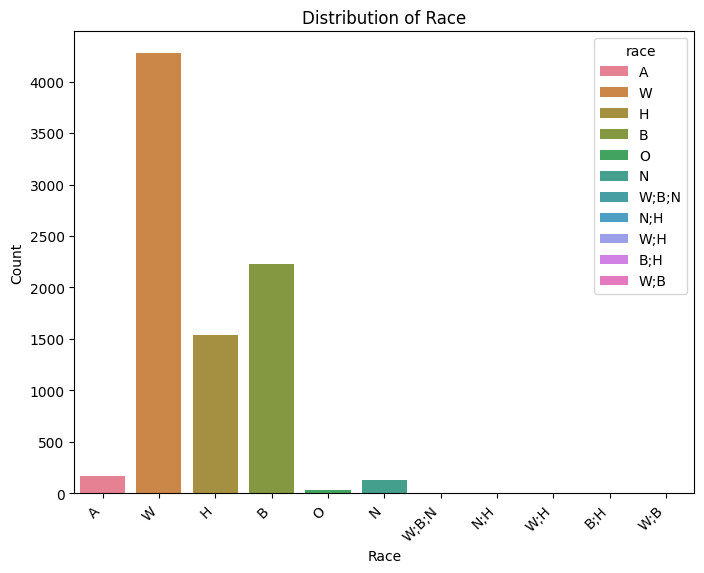

In [12]:
plt.figure(figsize=(8, 6))
sns.countplot(x='race', data=df, hue='race')
plt.title('Distribution of Race')
plt.xlabel('Race')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()


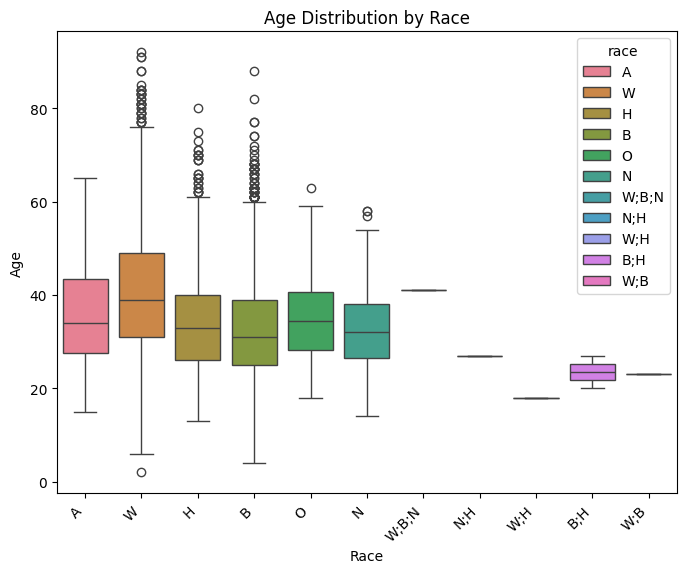

In [11]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='race', y='age', data=df, hue='race')
plt.title('Age Distribution by Race')
plt.xlabel('Race')
plt.ylabel('Age')
plt.xticks(rotation=45, ha='right')
plt.show()

**Use scikit-learn KMeans to train the data. Use appropriate metric.**

In [13]:

from sklearn.preprocessing import LabelEncoder
df = df.apply(LabelEncoder().fit_transform)

In [ ]:
numerical_features = ['age', 'another_numerical_column']  # Replace with your chosen features
X = df[numerical_features]

# Handle missing values (e.g., imputation or removal)
X = X.dropna()  # Example: Remove rows with missing values

# 2. Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. KMeans Clustering
# Determine the optimal number of clusters (e.g., using the elbow method - see next step)
n_clusters = 3  # Example: Set to 3 clusters initially

kmeans = KMeans(n_clusters=n_clusters, random_state=42)  # Initialize KMeans
kmeans.fit(X_scaled)  # Train the model

# 4. Get Cluster Labels
cluster_labels = kmeans.labels_
df['cluster'] = cluster_labels  # Add cluster labels to the DataFrame